In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg
import random

In [66]:
data_dir = "C:/Users/nasty/навчання/3_курс/літо/нейронки/залік/animals"

In [67]:
batch_size = 32
image_size = (224, 224)
img_height = 224
img_width = 224
validation_split = 0.2

In [76]:
data_generator = ImageDataGenerator(rescale=1./255,  validation_split=0.2)

In [77]:
data = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 26179 images belonging to 10 classes.


In [78]:
classes = sorted(os.listdir(data_dir))

In [79]:
image_counts = []
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    image_count = len(os.listdir(class_path))
    image_counts.append(image_count)

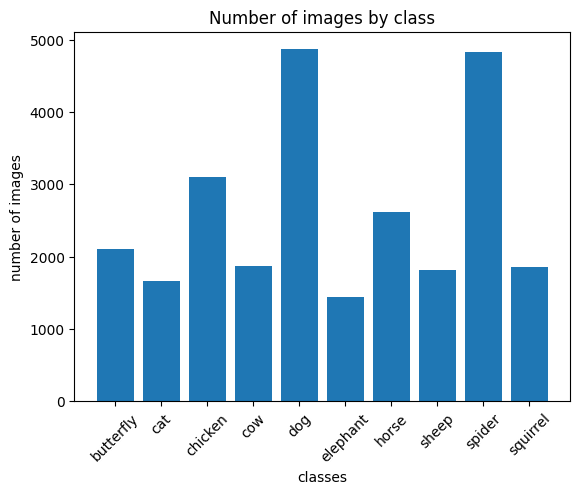

In [80]:
plt.bar(classes, image_counts)
plt.xlabel('classes')
plt.ylabel('number of images')
plt.title('Number of images by class')
plt.xticks(rotation=45)
plt.show()

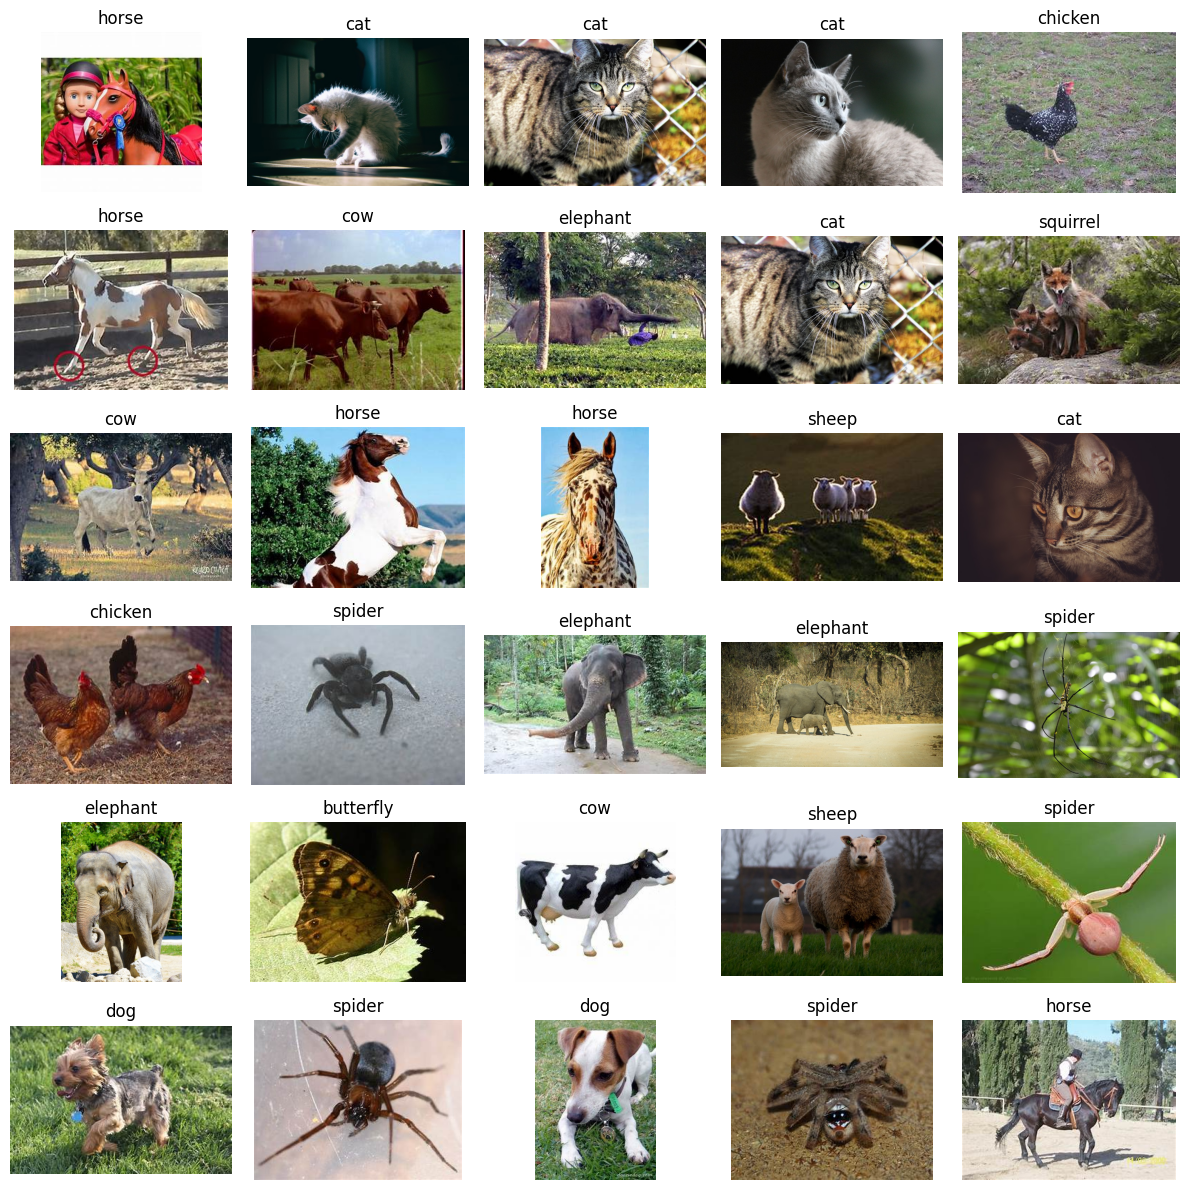

In [81]:
fig, axes = plt.subplots(6, 5, figsize=(12, 12))

for i in range(6):
    for j in range(5):
        class_name = random.choice(classes)
        class_path = os.path.join(data_dir, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        image = mpimg.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        axes[i, j].set_title(class_name)
    
plt.tight_layout()
plt.show()

In [82]:
train_data = data_generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 20947 images belonging to 10 classes.


In [83]:
test_data = data_generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 5232 images belonging to 10 classes.
